In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.utils import resample

In [3]:
# Get "safe" Q's
def q(n):
    q = 1 - 10**(-n)
    return data["Value"].quantile(q, interpolation="lower")

In [4]:
# getting data from excel file
cwd = os.getcwd()
pardir = os.path.dirname(cwd)
data = pd.read_excel(pardir + "\\20201030_data.xlsx", sheet_name=1).iloc[2:,1:4]
data.columns = data.iloc[0]
data = data.iloc[1:]
data = data.reset_index(drop=True)
data.columns.name = None
data = data.convert_dtypes()

# getting statistics from excel file
st = pd.read_excel(pardir + "\\20201030_data.xlsx", sheet_name=1, header=3).iloc[:1, 12:19]

# get bin width as variable since all bin width are the same
width = data["Width"][0]
data = data.drop(columns="Width") 

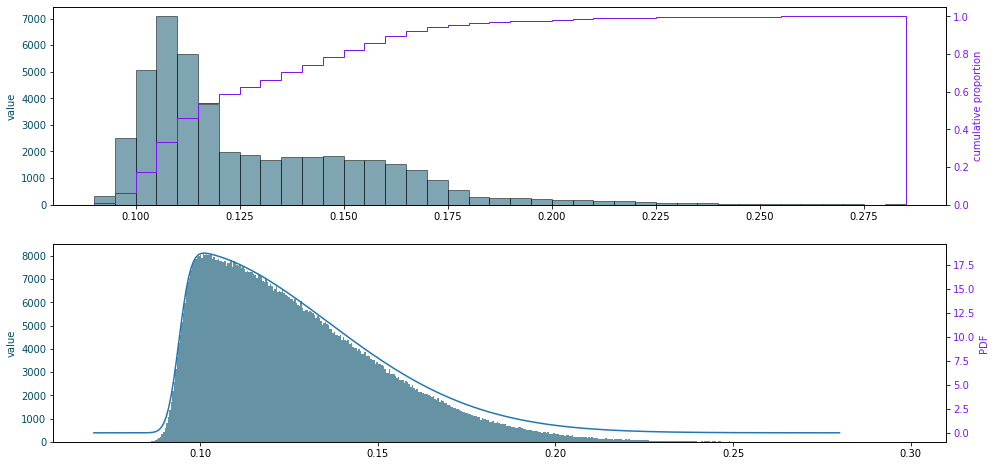

In [13]:
# Visual representation
color1 = "#004C66"
fig, axs = plt.subplots(2, figsize=(16,8))
axs[0].hist(x=data["Value"], weights=data["Count"],
         bins=data["Value"], alpha=0.5, ec='black',
         color=color1)
axs[0].set_ylabel("value", color=color1)
axs[0].tick_params(axis='y', labelcolor=color1)

ax_cdf = axs[0].twinx()
color2 = "#7b18ed"
ax_cdf.hist(x=data["Value"], weights=data["Count"],
         bins=data["Value"], density=True, histtype='step',
                           cumulative=True, label='Empirical', color = color2)
ax_cdf.set_ylabel("cumulative proportion", color=color2)
ax_cdf.tick_params(axis='y', labelcolor=color2)

# Curve fitting
results = np.repeat(data["Value"], data["Count"])
results = np.array(results)

a, loc, scale = stats.skewnorm.fit(results)

sample = stats.skewnorm(a, loc, scale).rvs(10**6)

axs[1].hist(sample, bins=500, alpha=.6, color=color1)
axs[1].set_ylabel("value", color=color1)
axs[1].tick_params(axis='y', labelcolor=color1)


ax_pdf = axs[1].twinx()

x = np.linspace(.07, .28, 300)
y = stats.skewnorm.pdf(x, a, loc, scale)
ax_pdf.plot(x,y)
ax_pdf.set_ylabel("PDF", color=color2)
ax_pdf.tick_params(axis='y', labelcolor=color2)

plt.show()

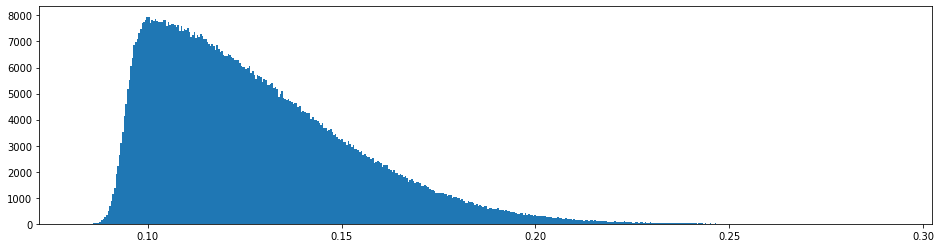

In [6]:
# Curve fitting
plt.figure(figsize=(16,4))
results = np.repeat(data["Value"], data["Count"])
results = np.array(results)

a, loc, scale = stats.skewnorm.fit(results)

sample = stats.skewnorm(a, loc, scale).rvs(10**6)

plt.hist(sample, bins=500)
plt.show()

In [7]:
# np.random.seed(42)
ex = np.random.randint(12, size=45000)
display(a)

15.9414800016831

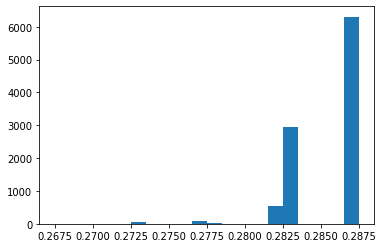

In [8]:
m = np.array([])

for _ in range(10**4):
#     r = stats.skewnorm(a, loc, scale).rvs()
    r = resample(results)
    m = np.append(m, np.quantile(r + width/2, 0.999999))
    
plt.hist(m, bins=20)
plt.show()

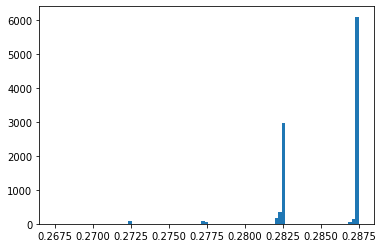

In [9]:
plt.hist(m, bins=87)
plt.show()

In [10]:
m.mean()

0.2854151010879977

In [11]:
st

,Min,Average,Q3,Q4,Q5,Q6,Max
0,0.089,0.126,0.253,0.278,0.285,NaN,0.285
